In [0]:
#Import Tools
import pandas as pd
import numpy as np

#Import Combined Dataset and drop columns with NaN Values
df = pd.read_csv("Combined_Data.csv")
df = df.dropna(axis=1)

In [54]:

#Seed for reproduction
np.random.seed(49)

#Set to 15-20 stocks over 7 industries
portfolionum = 15

tickers_in = df.columns.tolist()
tickers_in.remove("Date")
tickers_in = np.random.choice(tickers_in, size=portfolionum, replace=False)
tickers_in = tickers_in.tolist()
ticks = tickers_in.copy()
print(tickers_in)
tickers_in.append("Date")

['NTC', 'FIRSTSBANK', 'DUTCHBANGL', 'ARAMITCEM', 'OLYMPIC', 'POPULAR1MF', 'RAKCERAMIC', 'CONTININS', 'PRIMEBANK', 'ORIONPHARM', 'SONARBAINS', 'UNITEDAIR', 'AMCL(PRAN)', 'KPCL', 'FBFIF']


In [55]:
#Copies subset of dataframe of Combined Dataset
f_df = df[tickers_in].copy()

f_df.set_index('Date', inplace=True)

table = f_df

table.info()

table.head()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 2015-01-01 to 2017-12-28
Data columns (total 15 columns):
NTC           733 non-null float64
FIRSTSBANK    733 non-null float64
DUTCHBANGL    733 non-null float64
ARAMITCEM     733 non-null float64
OLYMPIC       733 non-null float64
POPULAR1MF    733 non-null float64
RAKCERAMIC    733 non-null float64
CONTININS     733 non-null float64
PRIMEBANK     733 non-null float64
ORIONPHARM    733 non-null float64
SONARBAINS    733 non-null float64
UNITEDAIR     733 non-null float64
AMCL(PRAN)    733 non-null float64
KPCL          733 non-null float64
FBFIF         733 non-null float64
dtypes: float64(15)
memory usage: 91.6+ KB


,NTC,FIRSTSBANK,DUTCHBANGL,ARAMITCEM,OLYMPIC,POPULAR1MF,RAKCERAMIC,CONTININS,PRIMEBANK,ORIONPHARM,SONARBAINS,UNITEDAIR,AMCL(PRAN),KPCL,FBFIF
Date,,,,,,,,,,,,,,,
2015-01-01,709.6,10.8,106.6,39.0,232.0,5.0,59.8,20.6,19.4,46.2,18.3,9.1,201.8,59.8,6.8
2015-01-05,720.0,10.7,105.2,39.1,234.2,4.9,59.2,20.1,18.8,45.9,18.4,9.0,198.5,60.9,6.8
2015-01-06,723.6,11.0,104.1,38.8,234.6,5.0,60.2,20.4,18.7,46.7,18.1,9.1,200.9,62.9,6.7
2015-01-07,726.1,11.2,102.3,38.8,236.4,4.9,60.1,20.2,18.8,46.5,18.3,9.0,199.3,61.5,6.6
2015-01-08,701.0,11.3,102.4,38.5,241.0,5.0,59.0,20.0,19.0,46.6,18.6,9.0,199.7,62.1,6.6


In [56]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
#print(returns_daily)
returns_annual = returns_daily.mean() * 250
print(returns_annual)

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

NTC           0.002542
FIRSTSBANK    0.161983
DUTCHBANGL    0.159526
ARAMITCEM     0.022327
OLYMPIC       0.099809
POPULAR1MF    0.123255
RAKCERAMIC    0.042023
CONTININS     0.098286
PRIMEBANK     0.160121
ORIONPHARM    0.059565
SONARBAINS    0.066477
UNITEDAIR    -0.070173
AMCL(PRAN)    0.060969
KPCL          0.025772
FBFIF         0.043294
dtype: float64


In [0]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(ticks)
#print(num_assets)
num_portfolios = 1000000

In [0]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #5values
    weights /= np.sum(weights)
    #print(weights)
    #print(returns_annual)
    #break
    returns = np.dot(weights, returns_annual) #1value
    #print(returns)
    #break
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights))) #1value
    #print(volatility)
    #break
    sharpe = returns / volatility #1value
    #print(sharpe)
    
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    #print(stock_weights)

Text(0.5, 1.0, 'Efficient Frontier')

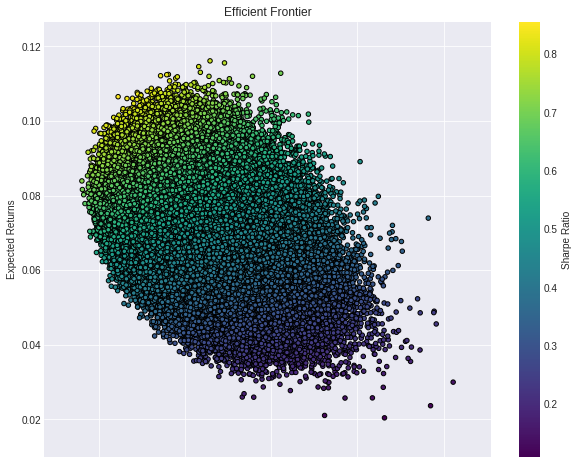

In [59]:
# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in ticks]

# reorder dataframe columns
df = df[column_order]
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
#cmap - viridis
#cmap - RdYlGn
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [60]:
df.head(15)

,Returns,Volatility,Sharpe Ratio,NTC Weight,FIRSTSBANK Weight,DUTCHBANGL Weight,ARAMITCEM Weight,OLYMPIC Weight,POPULAR1MF Weight,RAKCERAMIC Weight,CONTININS Weight,PRIMEBANK Weight,ORIONPHARM Weight,SONARBAINS Weight,UNITEDAIR Weight,AMCL(PRAN) Weight,KPCL Weight,FBFIF Weight
0,0.067516,0.144090,0.468566,0.029063,0.046738,0.100758,0.064663,0.006708,0.059940,0.037551,0.042959,0.094926,0.077869,0.068179,0.106911,0.089175,0.077974,0.096586
1,0.073516,0.146233,0.502734,0.115276,0.120833,0.111640,0.125394,0.024477,0.003967,0.016163,0.088827,0.028382,0.064375,0.123526,0.030952,0.065658,0.068981,0.011549
2,0.064594,0.150844,0.428221,0.027853,0.114029,0.016724,0.056806,0.065380,0.092806,0.068696,0.072292,0.054726,0.124772,0.021221,0.123970,0.028684,0.126204,0.005837
3,0.078484,0.143204,0.548059,0.014036,0.096033,0.057213,0.088554,0.076815,0.008504,0.114636,0.062328,0.152680,0.072392,0.018854,0.048952,0.006482,0.156631,0.025888
4,0.065388,0.149817,0.436450,0.024665,0.057276,0.059183,0.006017,0.072154,0.115874,0.049416,0.038917,0.068180,0.031096,0.096000,0.127312,0.008021,0.129273,0.116616
5,0.083364,0.135889,0.613470,0.000648,0.094930,0.099326,0.031693,0.100171,0.043927,0.061419,0.049186,0.102698,0.078617,0.109301,0.082158,0.051816,0.071719,0.022389
6,0.073856,0.153961,0.479707,0.047967,0.013761,0.142848,0.061287,0.035291,0.009629,0.033913,0.127678,0.076290,0.138456,0.127915,0.069894,0.006234,0.027839,0.081000
7,0.069694,0.131618,0.529513,0.116511,0.132528,0.018034,0.039058,0.028328,0.049093,0.087812,0.003051,0.078960,0.040339,0.091010,0.038715,0.120105,0.066345,0.090112
8,0.057440,0.136933,0.419473,0.139689,0.033383,0.002110,0.002614,0.134122,0.058978,0.117883,0.010661,0.075114,0.052486,0.079008,0.079266,0.053629,0.026315,0.134742
9,0.064002,0.142177,0.450158,0.044108,0.081957,0.020840,0.044724,0.127384,0.029729,0.119027,0.122471,0.013461,0.109797,0.054878,0.069631,0.025240,0.116586,0.020168


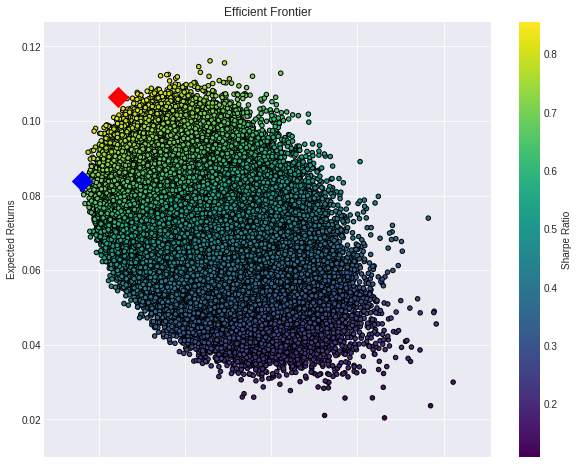

In [61]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
median_sharpe = df['Sharpe Ratio'].median()
median_volatility = df['Volatility'].median()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
median_sharpe_port = df.loc[df['Sharpe Ratio'].between(median_sharpe, median_sharpe+0.00001, inclusive=False)]                                                              
median_vol_port = df.loc[df['Volatility'].between(median_volatility, median_volatility+0.00001, inclusive=False)]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
#cmap - viridis
#cmap - RdYlGn
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)

plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [62]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,NTC Weight,FIRSTSBANK Weight,DUTCHBANGL Weight,ARAMITCEM Weight,OLYMPIC Weight,POPULAR1MF Weight,RAKCERAMIC Weight,CONTININS Weight,PRIMEBANK Weight,ORIONPHARM Weight,SONARBAINS Weight,UNITEDAIR Weight,AMCL(PRAN) Weight,KPCL Weight,FBFIF Weight
120413,0.106472,0.124507,0.855144,0.028041,0.159937,0.072409,0.007953,0.182281,0.106609,0.041597,0.009546,0.140857,0.017439,0.013381,0.003557,0.138987,0.074912,0.002496


In [63]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                     350663
Returns            0.083904
Volatility         0.116110
Sharpe Ratio       0.722626
NTC Weight         0.087383
FIRSTSBANK Weight  0.054382
DUTCHBANGL Weight  0.134624
ARAMITCEM Weight   0.003188
OLYMPIC Weight     0.136811
POPULAR1MF Weight  0.081247
RAKCERAMIC Weight  0.041256
CONTININS Weight   0.022097
PRIMEBANK Weight   0.078286
ORIONPHARM Weight  0.033067
SONARBAINS Weight  0.027110
UNITEDAIR Weight   0.027530
AMCL(PRAN) Weight  0.104507
KPCL Weight        0.130760
FBFIF Weight       0.037752
                     120413
Returns            0.106472
Volatility         0.124507
Sharpe Ratio       0.855144
NTC Weight         0.028041
FIRSTSBANK Weight  0.159937
DUTCHBANGL Weight  0.072409
ARAMITCEM Weight   0.007953
OLYMPIC Weight     0.182281
POPULAR1MF Weight  0.106609
RAKCERAMIC Weight  0.041597
CONTININS Weight   0.009546
PRIMEBANK Weight   0.140857
ORIONPHARM Weight  0.017439
SONARBAINS Weight  0.013381
UNITEDAIR Weight   0.003557
AMCL(PRAN) Weight  0